# MSc in Data Science and Big Data 
## Master Thesis
## Innovation & Entrepreneurship Business School
### Guillermo Altesor 


# NLP and Text Mining

<img src="https://miro.medium.com/max/475/1*bKz6UTji3SdDyb8-Pwm3Gg.png" style="float:center" width="400" >

- 

In [1]:
import pandas as pd
import numpy as np

cdf = pd.read_csv("Cured_ATT.csv")

# We need to set these dtype again

cdf['r_Date'] = pd.to_datetime(cdf['r_Date']) 
cdf['u_Id'] = cdf.u_Id.astype('category')
cdf['u_Country'] = cdf.u_Country.astype('category')
cdf['u_Trip_type'] = cdf.u_Trip_type.astype('category')
cdf['Item'] = cdf.Item.astype('category')
cdf['i_Island'] = cdf.i_Island.astype('category')
cdf['i_Type'] = cdf.i_Type.astype('category')

cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9860 entries, 0 to 9859
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   u_Id             9860 non-null   category      
 1   u_Country        7742 non-null   category      
 2   u_Contributions  9860 non-null   int64         
 3   u_Trip_type      5683 non-null   category      
 4   r_Title          9860 non-null   object        
 5   r_Core           9860 non-null   object        
 6   r_Rating         9860 non-null   float64       
 7   r_Date           9860 non-null   datetime64[ns]
 8   r_Helpful        9860 non-null   int64         
 9   i_Island         9860 non-null   category      
 10  Item             9860 non-null   category      
 11  i_Rating         9860 non-null   float64       
 12  i_Reviews        9860 non-null   int64         
 13  i_Excellent      9860 non-null   int64         
 14  i_Very_good      9860 non-null   int64  

It is well known the variety of posibilities abailable for the development of this kind of project, explore all of them is out of scope and a waste of time, sice the nature of this project is practical and with real world examples, in this Notebook we will a **State-of-the-Art NLP technique** such as LDA


    


## Topic Modeling with LDA

In [2]:
import os

os.chdir('..')

cdf.head()

,u_Id,u_Country,u_Contributions,u_Trip_type,r_Title,r_Core,r_Rating,r_Date,r_Helpful,i_Island,Item,i_Rating,i_Reviews,i_Excellent,i_Very_good,i_Average,i_Poor,i_Terrible,i_Type
0,1,United Kingdom,7,NaN,"Worth the trip, cable car needs minimum 90 min...",A great tour and interesting to see what makes...,4.0,2022-07-26,1,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
1,2,United Kingdom,7,NaN,Must see of Tenerife,A must see site on Tenerife. You can take eith...,5.0,2022-07-25,0,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
2,3,United Kingdom,44,Family,A must visit place in tenerife.,Absolutely awesome place to visit. It's a must...,5.0,2022-07-17,0,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
3,4,NaN,8,Family,Hike to the summit.,A drive up to El Tiede from the coast followed...,5.0,2022-07-17,0,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
4,5,United Kingdom,52,Couples,Spectacular,"It's number one for a reason. Once up, it's a ...",5.0,2022-07-17,1,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos


### Data Cleaning

In [3]:
# Remove unimportant columns
df = cdf.drop(columns=['u_Id', 'u_Country', 'u_Contributions', 'u_Trip_type', 'r_Rating', 'r_Helpful', 'i_Rating', 'i_Reviews', 'i_Excellent', 'i_Very_good', 'i_Average', 'i_Poor', 'i_Terrible'], axis=1)

# Print out the first rows of papers
df.head()

,r_Title,r_Core,r_Date,i_Island,Item,i_Type
0,"Worth the trip, cable car needs minimum 90 min...",A great tour and interesting to see what makes...,2022-07-26,Tenerife,Volcan El Teide,Volcanos
1,Must see of Tenerife,A must see site on Tenerife. You can take eith...,2022-07-25,Tenerife,Volcan El Teide,Volcanos
2,A must visit place in tenerife.,Absolutely awesome place to visit. It's a must...,2022-07-17,Tenerife,Volcan El Teide,Volcanos
3,Hike to the summit.,A drive up to El Tiede from the coast followed...,2022-07-17,Tenerife,Volcan El Teide,Volcanos
4,Spectacular,"It's number one for a reason. Once up, it's a ...",2022-07-17,Tenerife,Volcan El Teide,Volcanos


In [4]:
# Load the regular expression library
import re

# Remove punctuation
df['Review_processed'] = \
df['Review'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['Review_processed'] = \
df['Review_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['Review_processed'].head()

0    a great tour and interesting to see what makes...
1    a must see site on tenerife you can take eithe...
2    absolutely awesome place to visit it's a must ...
3    a drive up to el tiede from the coast followed...
4    it's number one for a reason once up it's a wo...
Name: r_Core_processed, dtype: object

We will print a WordCloud to verify the processing and ensuring we are on the right track

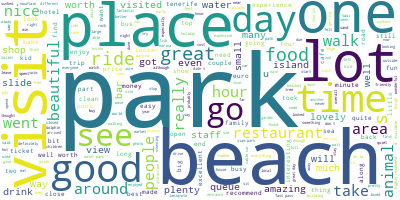

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['Review_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Preparing text for LDA analysis
We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.


In [ ]:
# we previusly pip install gensim and nltk through the Terminal (ctrl + ñ)
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.r_Core_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['great', 'tour', 'interesting', 'see', 'makes', 'island', 'add', 'cable', 'car', 'make', 'sure', 'guide', 'gives', 'minimum', 'minutes', 'joining', 'queue', 'bottom', 'getting', 'back', 'bus', 'rush', 'takes', 'shine', 'trip']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


### LDA model tranining
We'll keep all the parameters to default except for inputting the number of topics, in this case we will bould amodel with 15 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.
**At the end the Topics will be printed with their weighs.**

In [ ]:
from pprint import pprint

# number of topics
num_topics = 15

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"go" + 0.008*"park" + 0.008*"see" + 0.008*"one" + 0.008*"day" + '
  '0.007*"visit" + 0.007*"great" + 0.007*"well" + 0.007*"also" + '
  '0.006*"place"'),
 (1,
  '0.011*"good" + 0.009*"place" + 0.008*"beach" + 0.008*"day" + 0.008*"visit" '
  '+ 0.008*"great" + 0.007*"worth" + 0.006*"get" + 0.006*"really" + '
  '0.006*"nice"'),
 (2,
  '0.010*"well" + 0.007*"walk" + 0.007*"place" + 0.007*"get" + 0.006*"park" + '
  '0.006*"see" + 0.006*"area" + 0.006*"go" + 0.005*"day" + 0.005*"visit"'),
 (3,
  '0.012*"great" + 0.010*"good" + 0.007*"really" + 0.006*"beach" + '
  '0.006*"restaurants" + 0.006*"day" + 0.005*"back" + 0.005*"would" + '
  '0.005*"well" + 0.005*"way"'),
 (4,
  '0.010*"go" + 0.009*"great" + 0.009*"see" + 0.008*"place" + 0.008*"park" + '
  '0.007*"would" + 0.007*"get" + 0.007*"time" + 0.006*"around" + 0.006*"good"'),
 (5,
  '0.017*"park" + 0.010*"would" + 0.010*"good" + 0.009*"one" + 0.007*"day" + '
  '0.007*"beach" + 0.006*"great" + 0.006*"really" + 0.006*"water" + '


### Analysing LDA model

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join("c:", "TripAdvisorData"+str(num_topics))

# # this is a bit time consuming - make the if statement True _ '.C:\Users\guill\OneDrive\MÁSTER IEBS\GLOBAL PROJECT\LocalGP\TripAdvisorData'
# # if you want to execute visualization prep yourself
if 1 == True:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, "TripAdvisorData"+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.005785 -0.004429       1        1  14.769968
5      0.021310  0.003836       2        1  14.358943
11     0.010711 -0.007150       3        1   9.471483
0      0.004432  0.016540       4        1   9.283629
4      0.015095  0.014060       5        1   8.158360
10    -0.013339 -0.007468       6        1   8.103908
6     -0.006547  0.002925       7        1   5.070554
2     -0.013637 -0.007212       8        1   4.944264
3     -0.017894 -0.001327       9        1   4.843484
1     -0.001013  0.001149      10        1   4.489104
7      0.014937  0.006368      11        1   4.101402
13    -0.031106 -0.036854      12        1   3.479778
9     -0.043403  0.043568      13        1   3.142468
14     0.049189  0.007197      14        1   3.074737
8      0.005481 -0.031202      15        1   2.707917, topic_info=      Term         Freq        Total Category  logprob  loglift
8    great  2846.000000  2846.000000  Default  30.0000  30.0000
907  beach  3021.000000  3021.000000  Default  29.0000  29.0000
142    day  2830.000000  2830.000000  Default  28.0000  28.0000
260   park  3534.000000  3534.000000  Default  27.0000  27.0000
55   place  2296.000000  2296.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
460   nice    34.292349  1806.566260  Topic15  -5.6907  -0.3553
43   would    33.994285  1919.494883  Topic15  -5.6994  -0.4246
150   like    29.870806  1196.285043  Topic15  -5.8287  -0.0811
25    also    31.110004  1662.685691  Topic15  -5.7881  -0.3697
457   good    30.510033  2617.431739  Topic15  -5.8075  -0.8429

[1329 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
15560      2  0.701493       abades
6490       7  0.175798          abs
6490      10  0.175798          abs
6490      14  0.527394          abs
7267       5  0.523143  absolutelly
...      ...       ...          ...
3122      11  0.049023          zoo
3122      12  0.008170          zoo
3122      13  0.032682          zoo
3122      14  0.028596          zoo
3122      15  0.008170          zoo

[4239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 6, 12, 1, 5, 11, 7, 3, 4, 2, 8, 14, 10, 15, 9])